In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\insapab\.conda\envs\AIMachine\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\insapab\.conda\envs\AIMachine\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\insapab\.conda\envs\AIMachine\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\insapab\.conda\envs\AIMachine

In [2]:
csv_reader = pd.read_csv(r'C:\Users\insapab\Desktop\Python\Projects\Deep Learning based fall-detection\Week4\dataset_new.csv')

In [3]:
csv_reader.shape

(46087, 35)

In [4]:
csv_reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46087 entries, 0 to 46086
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nose_xCoord           46087 non-null  float64
 1   nose_yCoord           46087 non-null  float64
 2   leftEye_xCoord        46087 non-null  float64
 3   leftEye_yCoord        46087 non-null  float64
 4   rightEye_xCoord       46087 non-null  float64
 5   rightEye_yCoord       46087 non-null  float64
 6   leftEar_xCoord        46087 non-null  float64
 7   leftEar_yCoord        46087 non-null  float64
 8   rightEar_xCoord       46087 non-null  float64
 9   rightEar_yCoord       46087 non-null  float64
 10  leftShoulder_xCoord   46087 non-null  float64
 11  leftShoulder_yCoord   46087 non-null  float64
 12  rightShoulder_xCoord  46087 non-null  float64
 13  rightShoulder_yCoord  46087 non-null  float64
 14  leftElbow_xCoord      46087 non-null  float64
 15  leftElbow_yCoord   

In [5]:
csv_reader.isnull().sum()

nose_xCoord             0
nose_yCoord             0
leftEye_xCoord          0
leftEye_yCoord          0
rightEye_xCoord         0
rightEye_yCoord         0
leftEar_xCoord          0
leftEar_yCoord          0
rightEar_xCoord         0
rightEar_yCoord         0
leftShoulder_xCoord     0
leftShoulder_yCoord     0
rightShoulder_xCoord    0
rightShoulder_yCoord    0
leftElbow_xCoord        0
leftElbow_yCoord        0
rightElbow_xCoord       0
rightElbow_yCoord       0
leftWrist_xCoord        0
leftWrist_yCoord        0
rightWrist_xCoord       0
rightWrist_yCoord       0
leftHip_xCoord          0
leftHip_yCoord          0
rightHip_xCoord         0
rightHip_yCoord         0
leftKnee_xCoord         0
leftKnee_yCoord         0
rightKnee_xCoord        0
rightKnee_yCoord        0
leftAnkle_xCoord        0
leftAnkle_yCoord        0
rightAnkle_xCoord       0
rightAnkle_yCoord       0
action                  0
dtype: int64

In [6]:
csv_reader.head()

,nose_xCoord,nose_yCoord,leftEye_xCoord,leftEye_yCoord,rightEye_xCoord,rightEye_yCoord,leftEar_xCoord,leftEar_yCoord,rightEar_xCoord,rightEar_yCoord,leftShoulder_xCoord,leftShoulder_yCoord,rightShoulder_xCoord,rightShoulder_yCoord,leftElbow_xCoord,leftElbow_yCoord,rightElbow_xCoord,rightElbow_yCoord,leftWrist_xCoord,leftWrist_yCoord,rightWrist_xCoord,rightWrist_yCoord,leftHip_xCoord,leftHip_yCoord,rightHip_xCoord,rightHip_yCoord,leftKnee_xCoord,leftKnee_yCoord,rightKnee_xCoord,rightKnee_yCoord,leftAnkle_xCoord,leftAnkle_yCoord,rightAnkle_xCoord,rightAnkle_yCoord,action
0,56.190699,296.234485,47.495736,304.506221,47.426405,290.856178,54.045254,317.089020,51.259983,284.022411,98.719044,335.695742,100.930659,276.349225,157.444074,355.579856,160.055622,263.549644,211.092471,340.496882,211.716219,265.121970,206.776064,326.265427,206.764836,283.173980,298.463096,327.059039,293.699426,291.596869,365.788908,335.774955,361.338563,295.586793,Sitting
1,58.070928,294.830473,50.438684,303.459697,50.413592,289.433166,53.729076,316.393431,54.849626,285.199219,93.755129,332.737840,98.838978,276.021288,157.410591,355.818210,160.001528,263.775434,210.561140,340.941379,213.042795,265.595944,207.230442,326.509203,206.469197,285.407934,296.631039,327.641395,295.514859,288.871951,366.269758,335.466869,361.195325,295.577829,Sitting
2,60.347484,293.276433,52.336790,302.564670,51.749057,286.061810,55.336751,314.123402,56.071776,283.196761,99.536148,335.110901,98.860682,274.606000,158.371219,355.589284,160.047945,263.605888,212.588271,340.294056,213.446340,265.688338,207.995333,326.541586,206.597968,285.700611,296.139735,327.478825,296.085122,288.846652,365.683480,335.637860,361.131568,295.322548,Sitting
3,60.354865,293.306309,52.357229,302.583683,51.762654,286.115169,55.277190,314.167158,56.112637,283.222878,99.445646,335.118755,98.875438,274.704609,158.187421,355.583027,160.002901,263.667578,212.520676,340.506925,213.198046,265.694996,208.177199,326.640903,206.658796,285.600408,296.232999,327.496065,296.276140,288.761548,365.609956,335.688486,361.174033,295.351302,Sitting
4,65.561807,293.525188,56.037613,300.768831,57.071169,285.863794,57.981080,313.506743,58.160196,281.245576,100.224719,332.374132,100.049734,274.107841,159.574954,355.690267,159.897382,264.676454,215.138463,339.589972,213.799203,266.681833,209.853354,325.764535,206.813333,286.422076,296.605081,327.646756,295.789608,288.276175,364.847562,335.984524,360.887404,295.336077,Sitting


In [7]:
csv_reader['action'].value_counts()

Walking    17352
Sitting    11635
Pushups    10470
Falling     6630
Name: action, dtype: int64

In [8]:
Sitting = csv_reader[csv_reader['action']=='Sitting'].head(6630).copy()
Pushups = csv_reader[csv_reader['action']=='Pushups'].head(6630).copy()
Walking = csv_reader[csv_reader['action']=='Walking'].head(6630).copy()
Falling = csv_reader[csv_reader['action']=='Falling'].head(6630).copy()
balance_data =  pd.DataFrame()
balance_data =  balance_data.append([Sitting, Pushups, Walking, Falling])
balance_data.shape


(26520, 35)

In [9]:
balance_data['action'].value_counts()

Walking    6630
Falling    6630
Sitting    6630
Pushups    6630
Name: action, dtype: int64

In [10]:
balance_data.head()

,nose_xCoord,nose_yCoord,leftEye_xCoord,leftEye_yCoord,rightEye_xCoord,rightEye_yCoord,leftEar_xCoord,leftEar_yCoord,rightEar_xCoord,rightEar_yCoord,leftShoulder_xCoord,leftShoulder_yCoord,rightShoulder_xCoord,rightShoulder_yCoord,leftElbow_xCoord,leftElbow_yCoord,rightElbow_xCoord,rightElbow_yCoord,leftWrist_xCoord,leftWrist_yCoord,rightWrist_xCoord,rightWrist_yCoord,leftHip_xCoord,leftHip_yCoord,rightHip_xCoord,rightHip_yCoord,leftKnee_xCoord,leftKnee_yCoord,rightKnee_xCoord,rightKnee_yCoord,leftAnkle_xCoord,leftAnkle_yCoord,rightAnkle_xCoord,rightAnkle_yCoord,action
0,56.190699,296.234485,47.495736,304.506221,47.426405,290.856178,54.045254,317.089020,51.259983,284.022411,98.719044,335.695742,100.930659,276.349225,157.444074,355.579856,160.055622,263.549644,211.092471,340.496882,211.716219,265.121970,206.776064,326.265427,206.764836,283.173980,298.463096,327.059039,293.699426,291.596869,365.788908,335.774955,361.338563,295.586793,Sitting
1,58.070928,294.830473,50.438684,303.459697,50.413592,289.433166,53.729076,316.393431,54.849626,285.199219,93.755129,332.737840,98.838978,276.021288,157.410591,355.818210,160.001528,263.775434,210.561140,340.941379,213.042795,265.595944,207.230442,326.509203,206.469197,285.407934,296.631039,327.641395,295.514859,288.871951,366.269758,335.466869,361.195325,295.577829,Sitting
2,60.347484,293.276433,52.336790,302.564670,51.749057,286.061810,55.336751,314.123402,56.071776,283.196761,99.536148,335.110901,98.860682,274.606000,158.371219,355.589284,160.047945,263.605888,212.588271,340.294056,213.446340,265.688338,207.995333,326.541586,206.597968,285.700611,296.139735,327.478825,296.085122,288.846652,365.683480,335.637860,361.131568,295.322548,Sitting
3,60.354865,293.306309,52.357229,302.583683,51.762654,286.115169,55.277190,314.167158,56.112637,283.222878,99.445646,335.118755,98.875438,274.704609,158.187421,355.583027,160.002901,263.667578,212.520676,340.506925,213.198046,265.694996,208.177199,326.640903,206.658796,285.600408,296.232999,327.496065,296.276140,288.761548,365.609956,335.688486,361.174033,295.351302,Sitting
4,65.561807,293.525188,56.037613,300.768831,57.071169,285.863794,57.981080,313.506743,58.160196,281.245576,100.224719,332.374132,100.049734,274.107841,159.574954,355.690267,159.897382,264.676454,215.138463,339.589972,213.799203,266.681833,209.853354,325.764535,206.813333,286.422076,296.605081,327.646756,295.789608,288.276175,364.847562,335.984524,360.887404,295.336077,Sitting


In [11]:
## check for correlation between input features 
balance_data_corr = balance_data.corr(method="pearson")
balance_data_corr_decision = balance_data_corr.applymap(str) 
for i in range(balance_data_corr.shape[0]):
    for j in range(balance_data_corr.shape[1]):
        if abs(balance_data_corr.iloc[i][j]) <= 0.1:
            balance_data_corr_decision.replace(balance_data_corr_decision.iloc[i][j], 'weak', inplace = True)
        elif abs(balance_data_corr.iloc[i][j]) >= 0.9:
            balance_data_corr_decision.replace(balance_data_corr_decision.iloc[i][j], 'Strong', inplace = True)
        else:
            balance_data_corr_decision.replace(balance_data_corr_decision.iloc[i][j], 'Normal', inplace = True)
balance_data_corr_decision

,nose_xCoord,nose_yCoord,leftEye_xCoord,leftEye_yCoord,rightEye_xCoord,rightEye_yCoord,leftEar_xCoord,leftEar_yCoord,rightEar_xCoord,rightEar_yCoord,leftShoulder_xCoord,leftShoulder_yCoord,rightShoulder_xCoord,rightShoulder_yCoord,leftElbow_xCoord,leftElbow_yCoord,rightElbow_xCoord,rightElbow_yCoord,leftWrist_xCoord,leftWrist_yCoord,rightWrist_xCoord,rightWrist_yCoord,leftHip_xCoord,leftHip_yCoord,rightHip_xCoord,rightHip_yCoord,leftKnee_xCoord,leftKnee_yCoord,rightKnee_xCoord,rightKnee_yCoord,leftAnkle_xCoord,leftAnkle_yCoord,rightAnkle_xCoord,rightAnkle_yCoord
nose_xCoord,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
nose_yCoord,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
leftEye_xCoord,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
leftEye_yCoord,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
rightEye_xCoord,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
rightEye_yCoord,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
leftEar_xCoord,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
leftEar_yCoord,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
rightEar_xCoord,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
rightEar_yCoord,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Strong,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal


In [12]:
## only 8 key independent features are identified based on correlation matrix
d ={'nose_xCoord': balance_data['nose_xCoord'], 'nose_yCoord': balance_data['nose_yCoord'], 'leftElbow_yCoord': balance_data['leftElbow_yCoord'], 'rightElbow_xCoord': balance_data['rightElbow_xCoord'], 'rightWrist_yCoord': balance_data['rightWrist_yCoord'], 'rightHip_yCoord': balance_data['rightHip_yCoord'], 'leftKnee_xCoord': balance_data['leftKnee_xCoord'], 'leftAnkle_yCoord': balance_data['leftAnkle_yCoord'], 'action': balance_data['action']}
balance_data =  pd.DataFrame(data=d)
balance_data.head()

,nose_xCoord,nose_yCoord,leftElbow_yCoord,rightElbow_xCoord,rightWrist_yCoord,rightHip_yCoord,leftKnee_xCoord,leftAnkle_yCoord,action
0,56.190699,296.234485,355.579856,160.055622,265.121970,283.173980,298.463096,335.774955,Sitting
1,58.070928,294.830473,355.818210,160.001528,265.595944,285.407934,296.631039,335.466869,Sitting
2,60.347484,293.276433,355.589284,160.047945,265.688338,285.700611,296.139735,335.637860,Sitting
3,60.354865,293.306309,355.583027,160.002901,265.694996,285.600408,296.232999,335.688486,Sitting
4,65.561807,293.525188,355.690267,159.897382,266.681833,286.422076,296.605081,335.984524,Sitting


In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
balance_data.iloc[:,8]=labelencoder_Y.fit_transform(balance_data.iloc[:,8].values)
balance_data.head()

,nose_xCoord,nose_yCoord,leftElbow_yCoord,rightElbow_xCoord,rightWrist_yCoord,rightHip_yCoord,leftKnee_xCoord,leftAnkle_yCoord,action
0,56.190699,296.234485,355.579856,160.055622,265.121970,283.173980,298.463096,335.774955,2
1,58.070928,294.830473,355.818210,160.001528,265.595944,285.407934,296.631039,335.466869,2
2,60.347484,293.276433,355.589284,160.047945,265.688338,285.700611,296.139735,335.637860,2
3,60.354865,293.306309,355.583027,160.002901,265.694996,285.600408,296.232999,335.688486,2
4,65.561807,293.525188,355.690267,159.897382,266.681833,286.422076,296.605081,335.984524,2


In [14]:
X_Raw=balance_data.iloc[:,0:8].values 
Y =balance_data.iloc[:,8].values
X_Raw.shape

(26520, 8)

In [15]:
from sklearn.preprocessing import StandardScaler
scaled_data = pd.DataFrame()
sc=StandardScaler()
X = sc.fit_transform(X_Raw)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.20, random_state=0)
X_train.shape,X_test.shape,Y_train.shape, Y_test.shape

((21216, 8), (5304, 8), (21216,), (5304,))

In [17]:
# Sequential NN model
## The expectation is that the addition of batch normalization would accelerate the training process, offering similar or better classification accuracy of the model in fewer training epochs. Batch normalization is also reported as providing a modest form of regularization, meaning that it may also offer a small reduction in generalization error demonstrated by a small increase in classification accuracy on the holdout test dataset
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import layers
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer=Adam(lr = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 5,252
Trainable params: 5,124
Non-trainable params: 128
_________________________________________________________________


In [20]:
history = model.fit(X_train, keras.utils.to_categorical(Y_train,num_classes=4), validation_data=(X_test, keras.utils.to_categorical(Y_test,num_classes=4)), batch_size= 100, epochs=50, verbose=1)

Train on 21216 samples, validate on 5304 samples
Epoch 1/50
21216/21216 [==============================] - 1s 42us/step - loss: 0.5709 - acc: 0.7768 - val_loss: 0.3761 - val_acc: 0.8552
Epoch 2/50
21216/21216 [==============================] - 0s 16us/step - loss: 0.3310 - acc: 0.8659 - val_loss: 0.2972 - val_acc: 0.8844
Epoch 3/50
21216/21216 [==============================] - 0s 18us/step - loss: 0.2722 - acc: 0.8840 - val_loss: 0.2479 - val_acc: 0.8920
Epoch 4/50
21216/21216 [==============================] - 0s 19us/step - loss: 0.2367 - acc: 0.8953 - val_loss: 0.2375 - val_acc: 0.9021
Epoch 5/50
21216/21216 [==============================] - 0s 17us/step - loss: 0.2154 - acc: 0.9045 - val_loss: 0.1954 - val_acc: 0.9112
Epoch 6/50
21216/21216 [==============================] - 0s 18us/step - loss: 0.1992 - acc: 0.9115 - val_loss: 0.1852 - val_acc: 0.9172
Epoch 7/50
21216/21216 [==============================] - 0s 21us/step - loss: 0.1867 - acc: 0.9140 - val_loss: 0.1775 - val_acc:

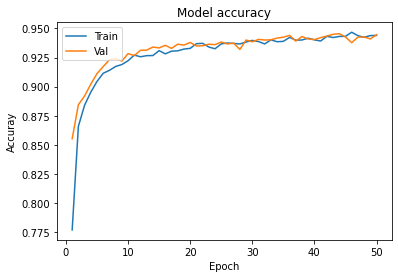

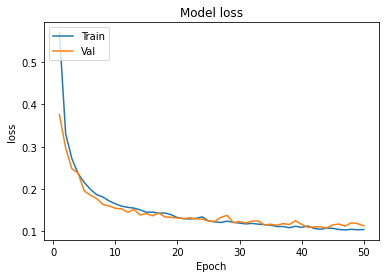

In [24]:
## learning curves
import matplotlib.pyplot as plt
epochs = 50
epoch_range = range(1,epochs+1)
#plotting traning & validation accuracy values
history.history.keys()
plt.plot(epoch_range, history.history['acc'])
plt.plot(epoch_range, history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuray')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()
#plotting training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [ ]:
## confusion matrix
#from mlxtend.plotting import plot_confusion_matrix
#from sklearn.metrics import confusion_matrix
#Y_predict = model.predict_classes(X_test)
#conf_mat = confusion_matrix(Y_test, Y_predict)
#plot_confusion_matrix(conf_mat = conf_mat, class_names = Y.classes_, show_normed = False)

In [22]:
Y_predict = model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_Matrix = confusion_matrix(Y_test, Y_predict)
confusion_Matrix

array([[1336,   17,   12,    3],
       [ 219, 1088,    1,    0],
       [  16,    0, 1255,    4],
       [  10,    0,   12, 1331]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report 
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, Y_predict)))
print('\nClassification Report\n')
print(classification_report(Y_test, Y_predict, target_names=['Sitting', 'Walking', 'PushUps', 'Falling']))


Accuracy: 0.94


Classification Report

              precision    recall  f1-score   support

     Sitting       0.85      0.98      0.91      1368
     Walking       0.98      0.83      0.90      1308
     PushUps       0.98      0.98      0.98      1275
     Falling       0.99      0.98      0.99      1353

    accuracy                           0.94      5304
   macro avg       0.95      0.94      0.94      5304
weighted avg       0.95      0.94      0.94      5304

